In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt24 = "Analyze the rdf of the simulation of 1A3N solvated in water"
llm_var = "gpt-4o-2024-05-13"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-21
time: 15:52:22
LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [3]:
agent.run(prompt24)

Thought: To analyze the radial distribution function (RDF) of the simulation of the protein 1A3N solvated in water, I need to ensure that I have the necessary trajectory and topology files for the simulation. I will use the RDFTool to perform this analysis.

Action:
```
{
  "action": "RDFTool",
  "action_input": {
    "input": {
      "trajectory_fileid": "1A3N_trajectory",
      "topology_fileid": "1A3N_topology"
    }
  }
}
```File ID not in Path Registry in RDF tool:  Trajectory File ID not in path registry
To proceed with the analysis of the radial distribution function (RDF) for the simulation of the protein 1A3N solvated in water, I need to first ensure that the necessary files are available in the path registry. I will list the available paths to check if the required files are present.

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```To proceed with the analysis of the radial distribution function (RDF) for the simulation of the 

2024-07-21 15:52:28.404 
  command:

    streamlit run /Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


To proceed with the analysis of the radial distribution function (RDF) for the simulation of the protein 1A3N solvated in water, I need to set up and run a short simulation to generate the required trajectory and topology files. I will use the `SetUpandRunFunction` tool for this purpose.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1A3N_155228",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "CutoffPeriodic",
      "nonbondedCutoff": "1.0 * nanometers",
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NPT",
      "Number of Steps": 5000,
      "record_interval_s

('The radial distribution function (RDF) analysis for the simulation of the protein 1A3N solvated in water has been successfully completed. The RDF plot has been generated and is available for review.\n\nFinal Answer: The RDF analysis for the simulation of the protein 1A3N solvated in water has been successfully completed. The RDF plot has been generated and is available for review. The analysis plot ID is fig0_155838.',
 '1ILMDLH0')

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-21
time: 15:58:42
Files found in registry: 1A3N_155228: PDB file downloaded from RSCB
 PDBFile ID: 1A3N_155228
 1A3N_155243: Cleaned File:  Removed Heterogens
 and Water Kept.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_155247: Initial positions for simulation sim0_155247
 sim0_155247: Basic Simulation of Protein 1A3N_155243
 rec0_155251: Simulation trajectory for protein 1A3N_155243 and simulation sim0_155247
 rec1_155251: Simulation state log for protein 1A3N_155243 and simulation sim0_155247
 rec2_155251: Simulation pdb frames for protein 1A3N_155243 and simulation sim0_155247
 fig0_155838: RDF plot for the trajectory file with id: rec0_155251


In [9]:
path_traj = registry.get_mapped_path("rec0_155251")
path_top = registry.get_mapped_path("top_sim0_155247")
assert os.path.exists(path_traj)
assert os.path.exists(path_top)
assert path_traj != path_top

assert path_traj.endswith(".dcd")
assert path_top.endswith(".pdb")

In [10]:
import mdtraj as md
traj = md.load(path_traj, top=path_top)
print(f"Simulation with :{traj.n_atoms} for {traj.n_frames} frames. Total time: {traj.time[-1]*0.002} ps")

Simulation with :24308 for 60 frames. Total time: 0.11800000000000001 ps


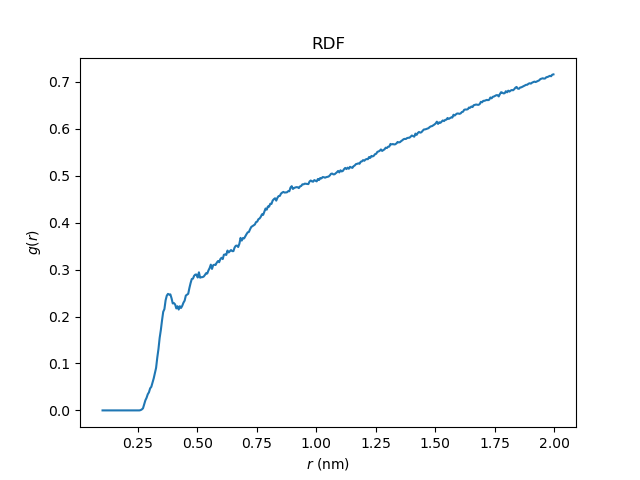

In [11]:
rdf_path = registry.get_mapped_path("fig0_155838")
#Disclaimer: Theres a bug in the rdf path saving. The image was created correctly, but the path was not saved correctly.
from IPython.display import Image
Image(filename=rdf_path)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### Logic make sense ✅
### Correct Answer  ✅